In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv('md_df.csv')

In [4]:
from sklearn import preprocessing

x = df.values
rscaler = preprocessing.RobustScaler()
x_scale = rscaler.fit_transform(x)


Text(0.55, 0.4, 'Best silhouette : 0.45, Optimal Clus : 39')

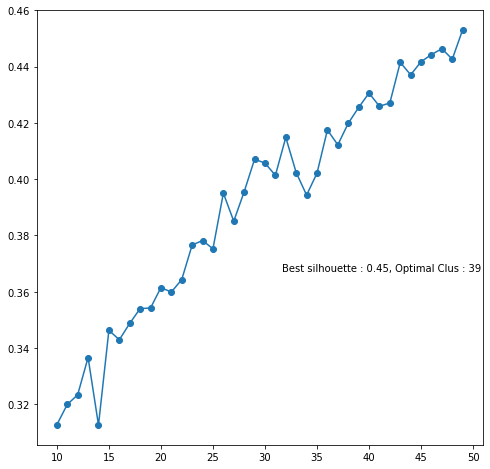

In [5]:
from sklearn import cluster, metrics
silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_scale)
    sil  = metrics.silhouette_score(x_scale, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)    

In [18]:
n_inputs = x_scale.shape[1]

inputs = keras.Input(shape=(n_inputs,))
hidden1e = layers.Dense(int(n_inputs/2),activation = 'relu')(inputs)
hidden2e = layers.Dense(int(n_inputs/4), activation = 'relu')(hidden1e)
hidden3e = layers.Dense(int(n_inputs/8), activation = 'relu')(hidden2e)
code = layers.Dense(2, activation = 'relu')(hidden3e)
hidden3d = layers.Dense(int(n_inputs/8), activation = 'relu')(code)
hidden2d = layers.Dense(int(n_inputs/4), activation = 'relu')(hidden3d)
hidden1d = layers.Dense(int(n_inputs/2),activation = 'relu')(hidden2d)
outputs = layers.Dense(n_inputs, activation = 'relu')(hidden1d)

autoencoder = keras.Model(inputs = inputs, outputs = outputs, name = "autoencoder")

autoencoder.summary()
autoencoder.compile(optimizer = 'adam', loss='mse')
history = autoencoder.fit(x_scale, x_scale, epochs = 100,batch_size = 1, verbose = 0)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 138)]             0         
                                                                 
 dense_8 (Dense)             (None, 69)                9591      
                                                                 
 dense_9 (Dense)             (None, 34)                2380      
                                                                 
 dense_10 (Dense)            (None, 17)                595       
                                                                 
 dense_11 (Dense)            (None, 2)                 36        
                                                                 
 dense_12 (Dense)            (None, 17)                51        
                                                                 
 dense_13 (Dense)            (None, 34)                

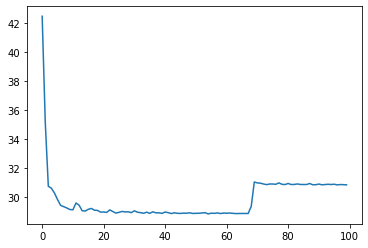

In [19]:
plt.plot(history.history['loss'], label='train')

In [20]:
encoder = keras.Model(inputs = inputs, outputs = code)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 138)]             0         
                                                                 
 dense_8 (Dense)             (None, 69)                9591      
                                                                 
 dense_9 (Dense)             (None, 34)                2380      
                                                                 
 dense_10 (Dense)            (None, 17)                595       
                                                                 
 dense_11 (Dense)            (None, 2)                 36        
                                                                 
Total params: 12,602
Trainable params: 12,602
Non-trainable params: 0
_________________________________________________________________


In [21]:
x_trans = encoder.predict(x_scale)

88/88 [==============================] - 0s 850us/step


In [22]:
clus = cluster.KMeans(n_clusters = 30)
clus.fit(x_scale)
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x_trans[:,0],x_trans[:,1, c = clus.labels_])
plt.show()

SyntaxError: invalid syntax (1695110456.py, line 4)

Text(0.55, 0.4, 'Best silhouette : 0.77, Optimal Clus : 24')

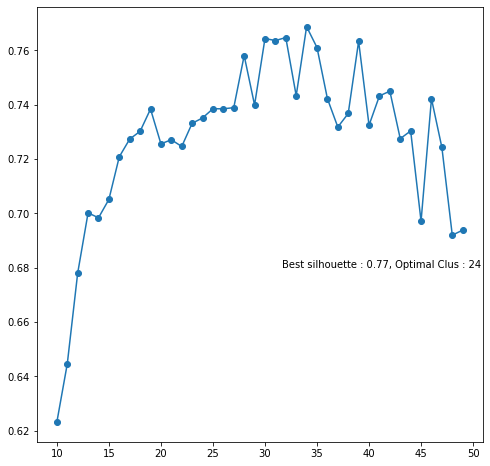

In [12]:

silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_trans)
    sil  = metrics.silhouette_score(x_trans, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)    

In [17]:
clus = cluster.KMeans(n_clusters = 24)
clus.fit(x_trans)
df['clus_label'] = clus.labels_
df.groupby('clus_label').agg('mean')

,n_order,payment_total,payment_mean,payment_std,"(6.621, 505.438]","(505.438, 999.316]","(999.316, 1493.194]","(1493.194, 1987.072]","(1987.072, 2480.95]","(2480.95, 2974.828]",...,{'sinalizacao_e_seguranca'},{'tablets_impressao_imagem'},{'telefonia'},{'telefonia_fixa'},"{'utilidades_domesticas', 'bebes'}","{'utilidades_domesticas', 'moveis_cozinha_area_de_servico_jantar_e_jardim'}",{'utilidades_domesticas'},rev_mean,rev_std,days_since_last_order
clus_label,,,,,,,,,,,,,,,,,,,,,
0,2.130178,338.598757,161.744584,75.650531,96.227811,2.440828,0.887574,0.000000,0.147929,0.147929,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.225789,0.449488,1778.440828
1,2.051282,424.391709,202.014010,61.556631,91.452991,8.119658,0.427350,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.815527,0.510676,1773.803419
2,2.041667,186.704583,92.435417,55.945662,97.916667,2.083333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,50.694583,0.000000,0.000000,0.000000,0.000000,4.458333,0.589256,1712.041667
3,2.100000,298.203500,118.794354,15.933339,97.500000,0.000000,2.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,4.245833,0.576875,1774.750000
4,2.000000,302.091111,151.045556,61.535444,97.685185,1.388889,0.925926,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.895833,0.402658,1845.546296
5,2.076923,286.136298,139.279283,50.590622,98.798077,1.201923,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.891026,0.392133,1825.802885
6,2.000000,271.648889,135.824444,61.828014,98.214286,1.190476,0.595238,0.000000,0.000000,0.000000,...,0.000000,0.198413,0.198413,0.000000,0.000000,0.000000,0.000000,4.115079,0.516300,1785.559524
7,2.190045,315.778326,146.152958,86.823132,96.304706,2.413258,1.055792,0.226244,0.000000,0.000000,...,0.000000,0.150814,0.000000,0.829548,0.000000,0.150814,58.814389,4.274183,0.519132,1745.158371
8,2.162362,276.296753,128.775707,61.082299,98.400996,1.230000,0.184502,0.184502,0.000000,0.000000,...,0.369004,0.061513,0.000000,0.184502,0.184502,0.000000,0.000000,4.077224,0.498683,1739.195572


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 139)]             0         
                                                                 
 dense_8 (Dense)             (None, 46)                6440      
                                                                 
 dense_9 (Dense)             (None, 10)                470       
                                                                 
 dense_10 (Dense)            (None, 46)                506       
                                                                 
 dense_11 (Dense)            (None, 139)               6533      
                                                                 
Total params: 13,949
Trainable params: 13,949
Non-trainable params: 0
_________________________________________________________________
88/88 [==============================] - 0s 713us/s

E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.55, 0.4, 'Best silhouette : 0.53, Optimal Clus : 16')

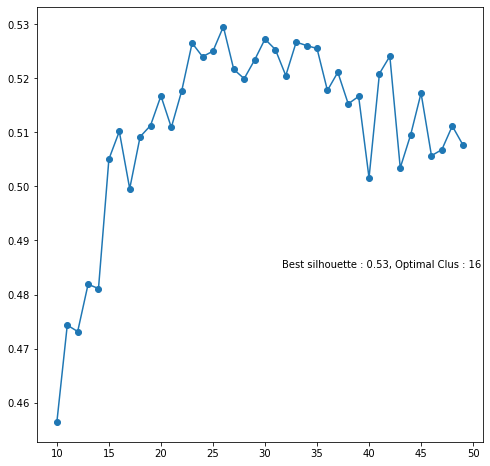

In [12]:
n_inputs = x_scale.shape[1]

inputs = keras.Input(shape=(n_inputs,))
hidden1e = layers.Dense(int(n_inputs/3),activation = 'relu')(inputs)
code = layers.Dense(10, activation = 'relu')(hidden1e)
hidden1d = layers.Dense(int(n_inputs/3), activation = 'relu')(code)
outputs = layers.Dense(n_inputs, activation = 'relu')(hidden1d)

autoencoder2 = keras.Model(inputs = inputs, outputs = outputs, name = "autoencoder")

autoencoder2.summary()
autoencoder2.compile(optimizer = 'adam', loss='mse')
history = autoencoder2.fit(x_scale, x_scale, epochs = 100, verbose = 0)

encoder2 = keras.Model(inputs = inputs, outputs = code)

x_trans2 = encoder2.predict(x_scale)

from sklearn.manifold import TSNE
tsne = TSNE()
x_proj = tsne.fit_transform(x_trans2)

silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_proj)
    sil  = metrics.silhouette_score(x_proj, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)    
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)    


E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


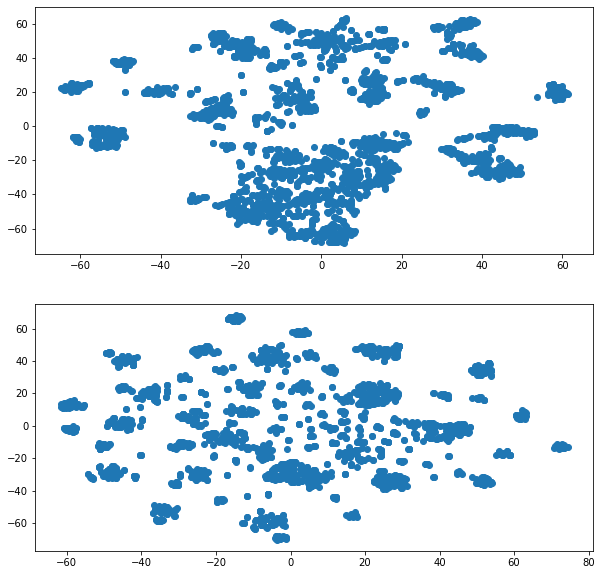

In [13]:
x_proj2 = tsne.fit_transform(x_scale)
fig, ax = plt.subplots(2, figsize = (10,10))
ax[0].scatter(x_proj[:,0], x_proj[:,1])
ax[1].scatter(x_proj2[:,0], x_proj2[:,1])


Text(0.55, 0.4, 'Best silhouette : 0.61, Optimal Clus : 38')

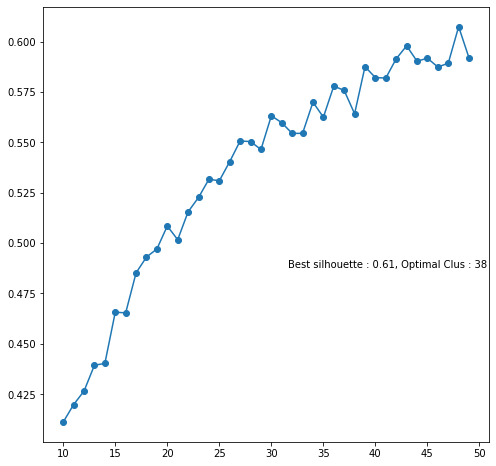

In [14]:
silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_proj2)
    sil  = metrics.silhouette_score(x_proj2, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)